In [44]:
%matplotlib inline
from consumer_complaints import *
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns

In [2]:
filename = "complaints_dec_2014.csv"
complaints_data = pd.read_csv(filename,converters = {6:str})
complaints_data.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN
1,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,NaN
2,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN
3,1177164,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN
4,1177163,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,12/31/2014,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN


In [3]:
complaints_data['Date received'] = pd.to_datetime(complaints_data['Date received'], format = "%m/%d/%Y")
complaints_data["Date sent to company"]=pd.to_datetime(complaints_data["Date sent to company"], format = "%m/%d/%Y")
complaints_data.set_index("Complaint ID",inplace = True)
complaints_data.head()

,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
Complaint ID,,,,,,,,,,,,,
1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,2014-12-31,2014-12-31,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN
1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,2014-12-31,2014-12-31,"Unique Management Services, Inc",Closed with explanation,Yes,NaN
1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,2014-12-31,2014-12-31,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN
1177164,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,2014-12-31,2014-12-31,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN
1177163,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,2014-12-31,2014-12-31,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN


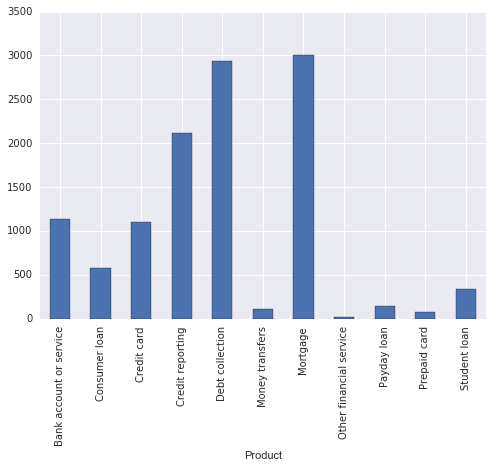

In [65]:
grouped_by_product = complaints_data.groupby("Product")
grouped_by_product.size().plot.bar()
plt.show()

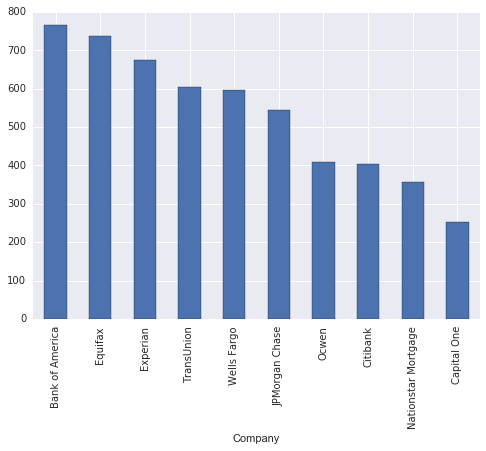

In [66]:
grouped_by_company = complaints_data.groupby("Company")
grouped_by_company.size().sort_values(ascending = False)[0:10].plot.bar()

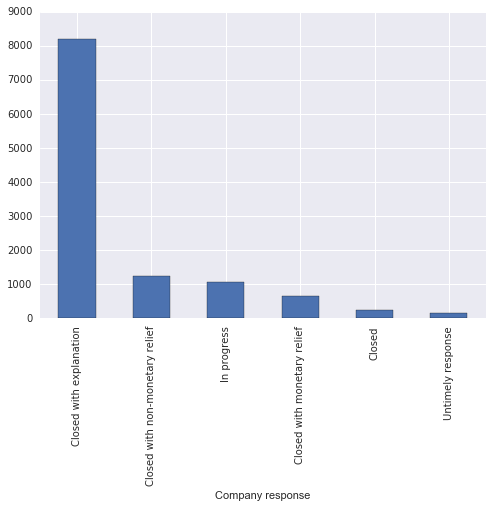

In [67]:
response_group = complaints_data.groupby("Company response")
response_group.size().sort_values(ascending = False).plot.bar()

In [7]:
complaints_data["Day of week sent"] = complaints_data["Date sent to company"].map(lambda x:x.weekday())
complaints_data.head()

,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?,Day of week sent
Complaint ID,,,,,,,,,,,,,,
1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,2014-12-31,2014-12-31,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN,2
1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,2014-12-31,2014-12-31,"Unique Management Services, Inc",Closed with explanation,Yes,NaN,2
1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,2014-12-31,2014-12-31,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN,2
1177164,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,2014-12-31,2014-12-31,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN,2
1177163,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068,Web,2014-12-31,2014-12-31,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN,2


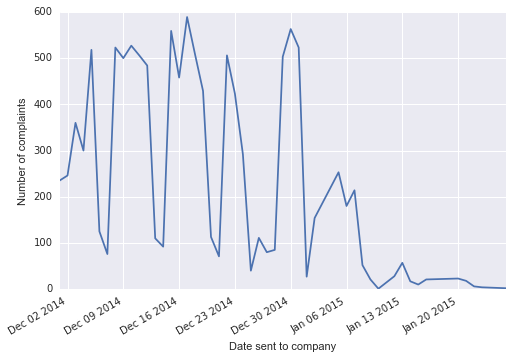

In [48]:
date_grouped = complaints_data.groupby("Date sent to company")
date_grouped.size().plot()
plt.ylabel("Number of complaints")
plt.show()

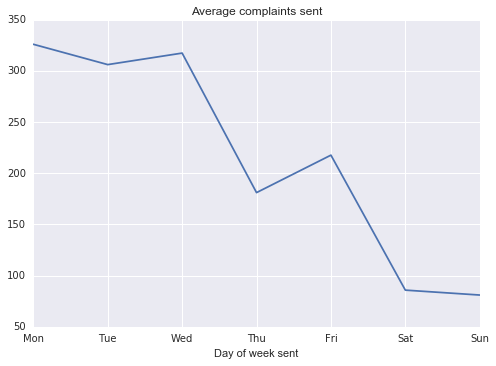

In [74]:
grouped_by_date_and_day_sent = complaints_data.groupby(["Day of week sent","Date sent to company"]).size()
grouped_by_day_sent = grouped_by_date_and_day_sent.reset_index()
grouped_by_day_sent.groupby("Day of week sent").mean().plot()
plt.xticks([0,1,2,3,4,5,6],['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.legend().remove()
plt.title('Average complaints sent')
plt.show()

In [59]:
zip_data = pd.read_csv("2010+Census+Population+By+Zipcode+(ZCTA).csv",converters ={0:str})
zip_data["Zip Code ZCTA"][0]
zip_data.set_index(zip_data["Zip Code ZCTA"],inplace = True)
zip_data["2010 Census Population"]['01001']
zip_data.head()

,Zip Code ZCTA,2010 Census Population
Zip Code ZCTA,,
01001,01001,16769
01002,01002,29049
01003,01003,10372
01005,01005,5079
01007,01007,14649


In [89]:
grouped_by_zip = complaints_data.groupby("ZIP code")
zip_frame = grouped_by_zip.size().sort_values(ascending = False).to_frame()
zip_frame["Population"] = zip_frame.index.to_series().map(lambda x:zip_data["2010 Census Population"].get(x,default = math.nan))
zip_frame["# per capita"] = zip_frame[0]/zip_frame["Population"]
print(zip_frame.head())
zip_frame.dropna(inplace = True)
print(zip_frame.head())

# zip_frame.sort_values(by = "# per capita",ascending = False,inplace = True)

            0 Population # per capita
ZIP code                             
          134        NaN          NaN
60445      42      26057   0.00161185
94030      27      21536   0.00125371
77065      25      35326  0.000707694
78232      23      35120  0.000654897
           0 Population # per capita
ZIP code                            
60445     42      26057   0.00161185
94030     27      21536   0.00125371
77065     25      35326  0.000707694
78232     23      35120  0.000654897
76028     22      59744  0.000368238


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

,0
ZIP code,
,134
60445,42
94030,27
77065,25
78232,23
